We have a Telecom company's data about their cutomers and we have to analyse why customers leave this company and what are the factors behind it.
We can also predict whether a customer will leave(churn) or not

In [41]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Loading our data

In [42]:
df = pd.read_csv('../data/TelcoChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
#Getting some info about the data we have
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Seeing number of unique entries in each column to help us with encoding

In [44]:
#Checking the number of unique entries in each column
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [45]:
#Checking for null
df.isnull().sum()
df[df['TotalCharges'].str.strip() == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [46]:
#We have some doubts on TotalCharges column
# Convert to numeric and force blanks to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check and drop/fill NaNs
df['TotalCharges'].isnull().sum()
df.dropna(subset=['TotalCharges'], inplace=True)


In [47]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Now, we will try to see what factors are responsible in customer churn

In [48]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Churn :  1869
Not Churn :  5163


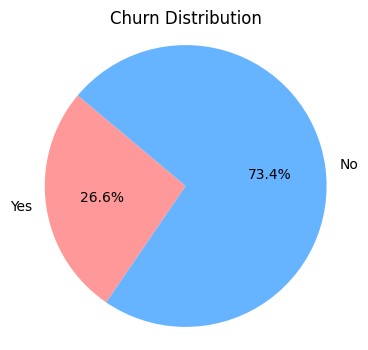

In [49]:
y = 0
n = 0
for i in df['Churn']:
     if i == 'Yes':
          y = y+1
     else:
          n = n+1

print("Churn : ",y)
print("Not Churn : ",n)

#Plotting Churn : Yes or No
values = [1869, 5163]
labels = ['Yes', 'No']
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

Now, that we know, 26% of the customers churn out of the company and are lost revenue, let's find out which factors are responsible

In [50]:
#Let's first find out the correlation of all the columns with the 
#churn column

#First, let's convert churn to numerical...it will also help in ML tasks
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [51]:
#We will compute Pearson correlation
correlation = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
print(correlation)

Churn             1.000000
MonthlyCharges    0.192858
SeniorCitizen     0.150541
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64


In [52]:
#Using one hot encoding
# Drop columns that are identifiers
df_wid = df.drop(['customerID'], axis=1)

# Convert categorical columns to one-hot
df_encoded = pd.get_dummies(df_wid, drop_first=True)

# Compute correlation with 'Churn'
correlation = df_encoded.corr()['Churn'].sort_values(ascending=False)
print(correlation)

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


<Axes: >

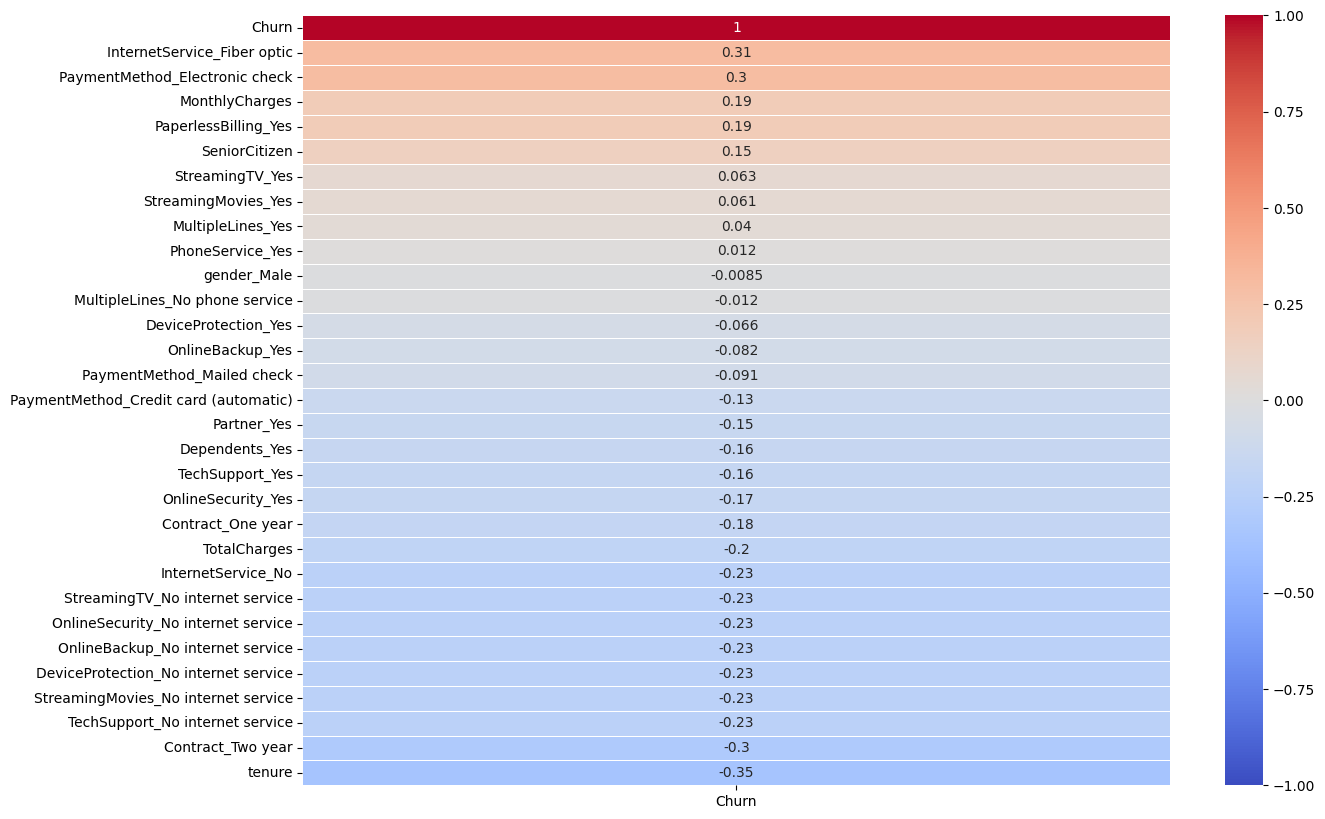

In [53]:
#Plotting the heatmap to visualise correlation 
df_wid.head()
corr_matrix = df_encoded.corr()
# print(corr_matrix)

#Heatmap for correlations with churn
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix[['Churn']].sort_values(by='Churn', ascending=False),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)

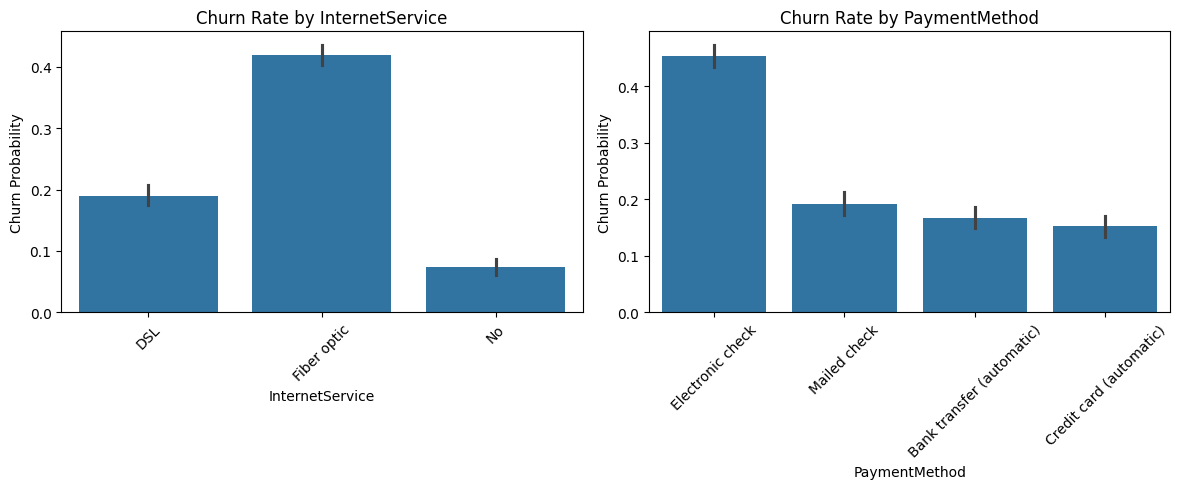

In [54]:
features = ['InternetService', 'PaymentMethod']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, feature in enumerate(features):
    sns.barplot(x=feature, y='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn Rate by {feature}')
    axes[i].set_ylabel('Churn Probability')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


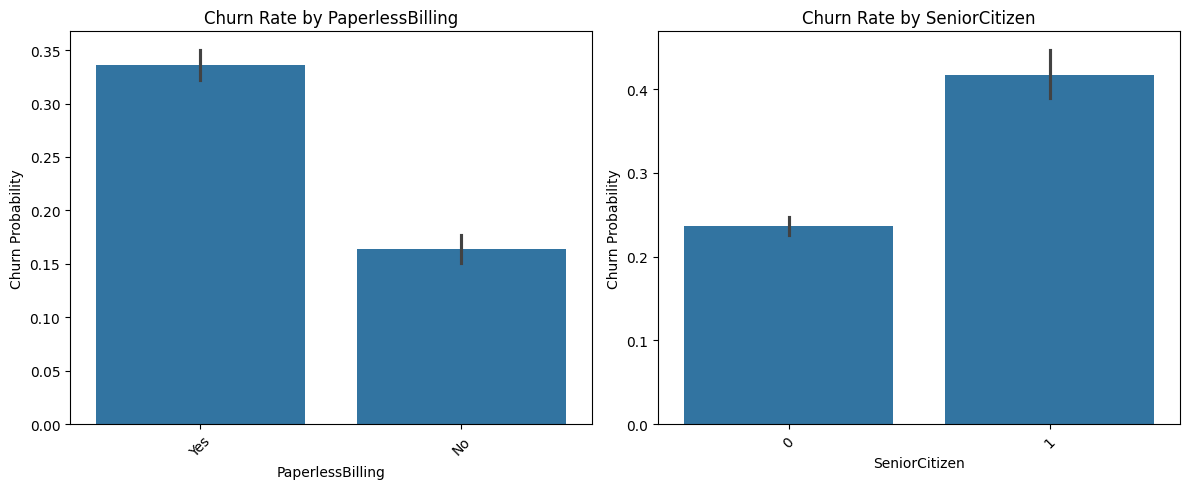

In [55]:
features = ['PaperlessBilling', 'SeniorCitizen']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, feature in enumerate(features):
    sns.barplot(x=feature, y='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn Rate by {feature}')
    axes[i].set_ylabel('Churn Probability')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


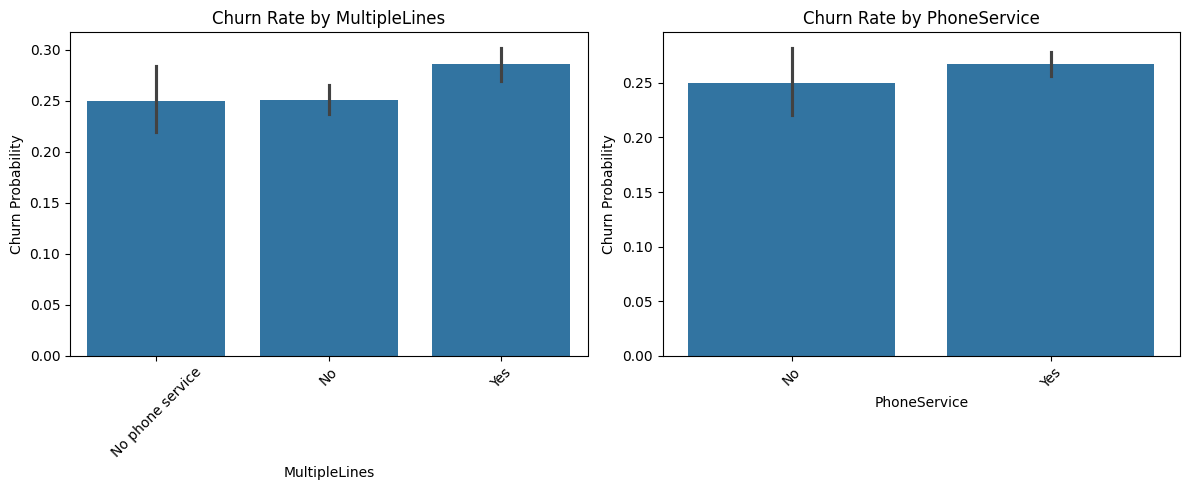

In [56]:
features = ['MultipleLines', 'PhoneService']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, feature in enumerate(features):
    sns.barplot(x=feature, y='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn Rate by {feature}')
    axes[i].set_ylabel('Churn Probability')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


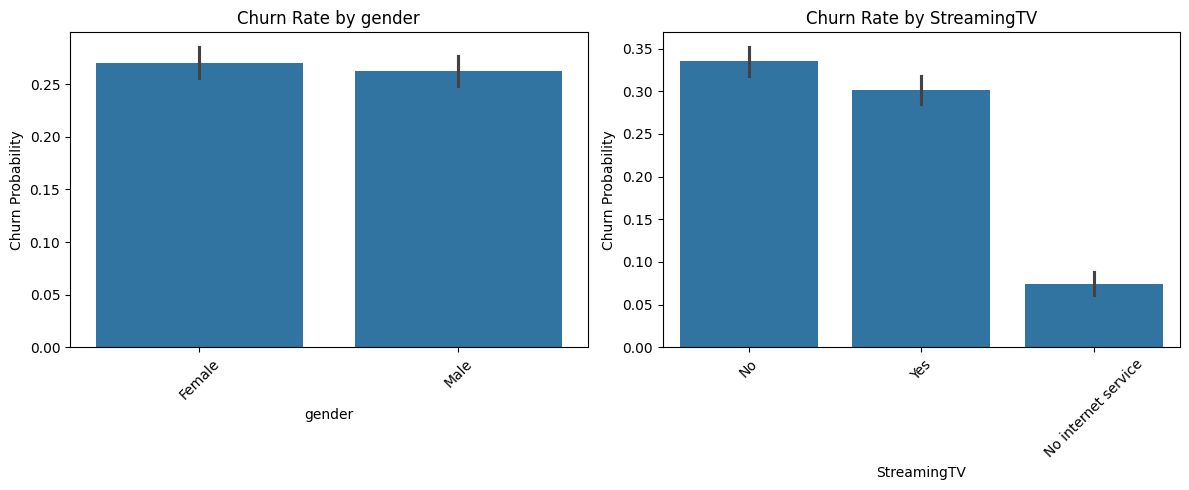

In [57]:
features = ['gender', 'StreamingTV']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, feature in enumerate(features):
    sns.barplot(x=feature, y='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn Rate by {feature}')
    axes[i].set_ylabel('Churn Probability')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


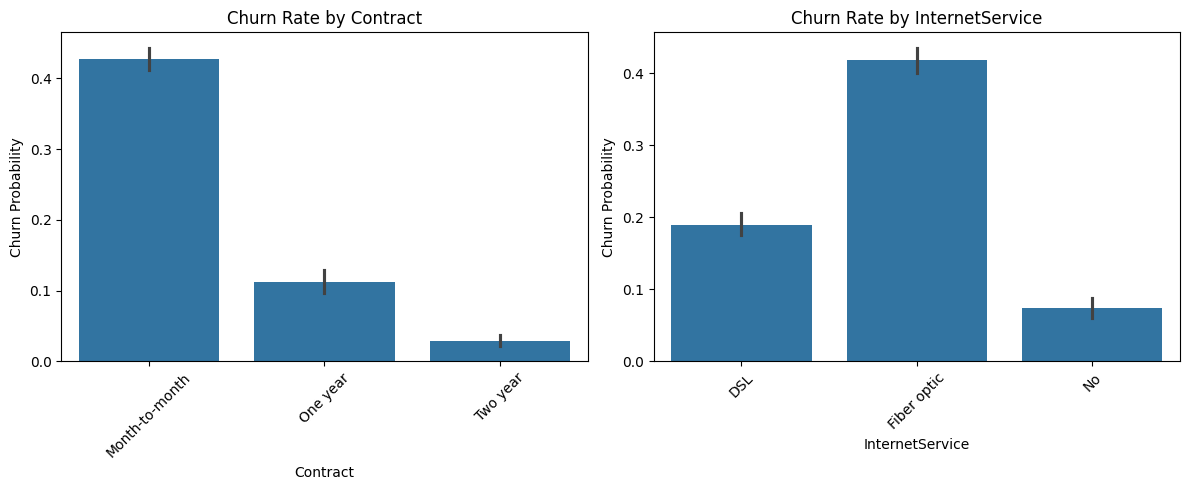

In [58]:
features = ['Contract', 'InternetService']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, feature in enumerate(features):
    sns.barplot(x=feature, y='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn Rate by {feature}')
    axes[i].set_ylabel('Churn Probability')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


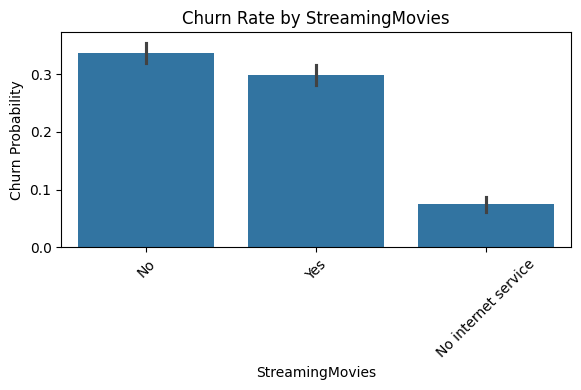

In [59]:
feature = 'StreamingMovies'

plt.figure(figsize=(6, 4))
sns.barplot(x=feature, y='Churn', data=df)
plt.title(f'Churn Rate by {feature}')
plt.ylabel('Churn Probability')
plt.xlabel(feature)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

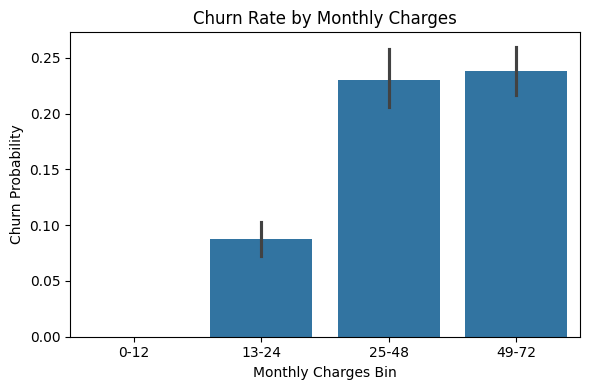

In [60]:
# Example for Numerical feature - tenure (binned)
df['MonthlyCharges_bin'] = pd.cut(df['MonthlyCharges'], bins=[0, 12, 24, 48, 72], labels=['0-12', '13-24', '25-48', '49-72'])

plt.figure(figsize=(6, 4))
sns.barplot(x='MonthlyCharges_bin', y='Churn', data=df)
plt.title('Churn Rate by Monthly Charges')
plt.ylabel('Churn Probability')
plt.xlabel('Monthly Charges Bin')
plt.tight_layout()
plt.show()


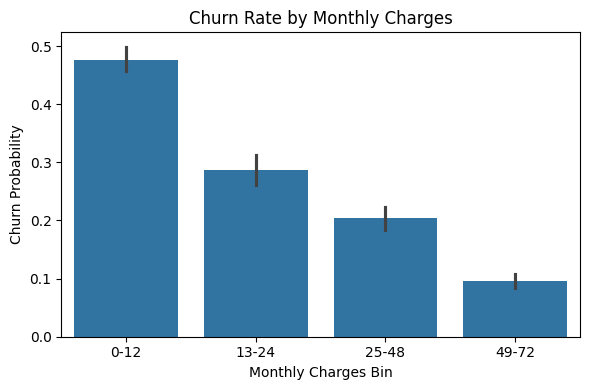

In [61]:
# Example for Numerical feature - tenure (binned)
df['MonthlyCharges_bin'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '13-24', '25-48', '49-72'])

plt.figure(figsize=(6, 4))
sns.barplot(x='MonthlyCharges_bin', y='Churn', data=df)
plt.title('Churn Rate by Monthly Charges')
plt.ylabel('Churn Probability')
plt.xlabel('Monthly Charges Bin')
plt.tight_layout()
plt.show()


C:\Users\aj030\AppData\Local\Temp\ipykernel_1392\1002091578.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, ax=axes[i], palette='Set2')
C:\Users\aj030\AppData\Local\Temp\ipykernel_1392\1002091578.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, ax=axes[i], palette='Set2')
C:\Users\aj030\AppData\Local\Temp\ipykernel_1392\1002091578.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, ax=axes[i], palette='Set2')


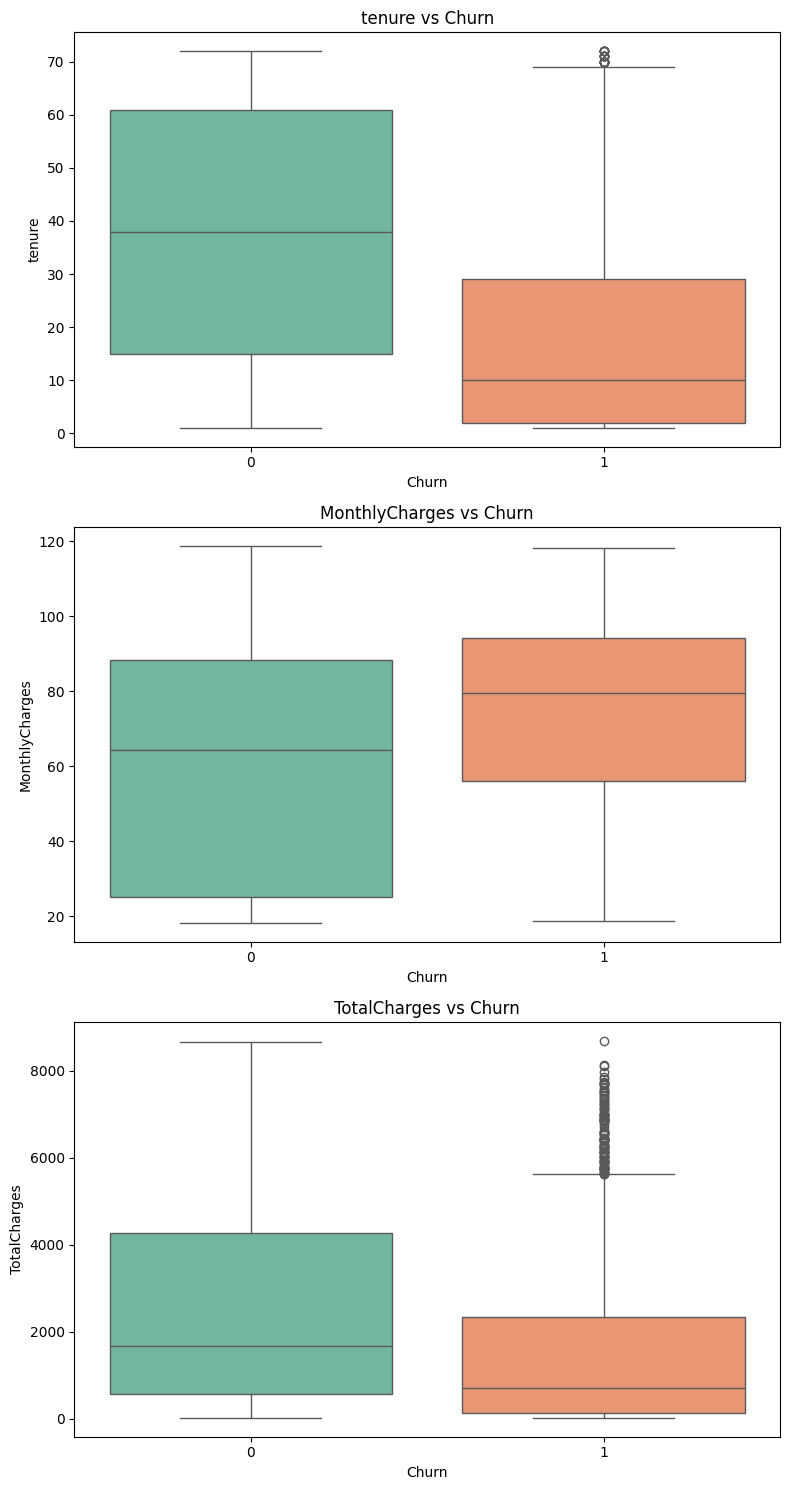

In [62]:
#making box plots to check for outliers
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 15))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Churn', y=feature, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} vs Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


C:\Users\aj030\AppData\Local\Temp\ipykernel_1392\1746838250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y=feature, data=df, ax=axes[i], palette='coolwarm', inner='box')
C:\Users\aj030\AppData\Local\Temp\ipykernel_1392\1746838250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y=feature, data=df, ax=axes[i], palette='coolwarm', inner='box')
C:\Users\aj030\AppData\Local\Temp\ipykernel_1392\1746838250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y=feature, data=df, ax=axes[i], palette

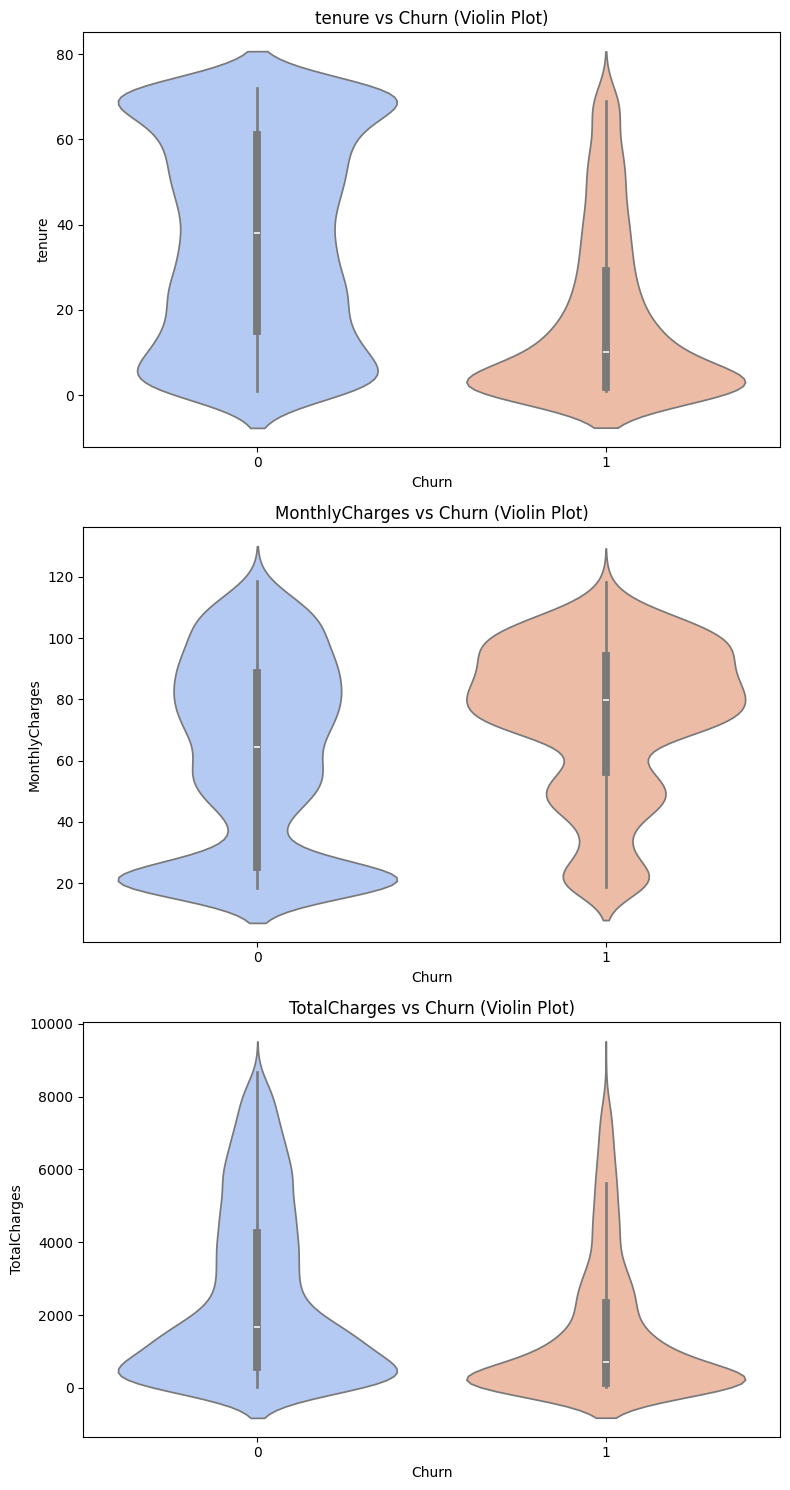

In [63]:
#Violin plots : To also see the distribution of values of different features
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 15))

for i, feature in enumerate(numerical_features):
    sns.violinplot(x='Churn', y=feature, data=df, ax=axes[i], palette='coolwarm', inner='box')
    axes[i].set_title(f'{feature} vs Churn (Violin Plot)')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

The Business Insight from this is that :

1) Churn is strongly associated with short tenure.

2) Customers who leave typically do so early.

3) Retention strategies should focus on first-year customers.

Now, we will start with some ML tasks so that we can predict if a particular customer will churn or not

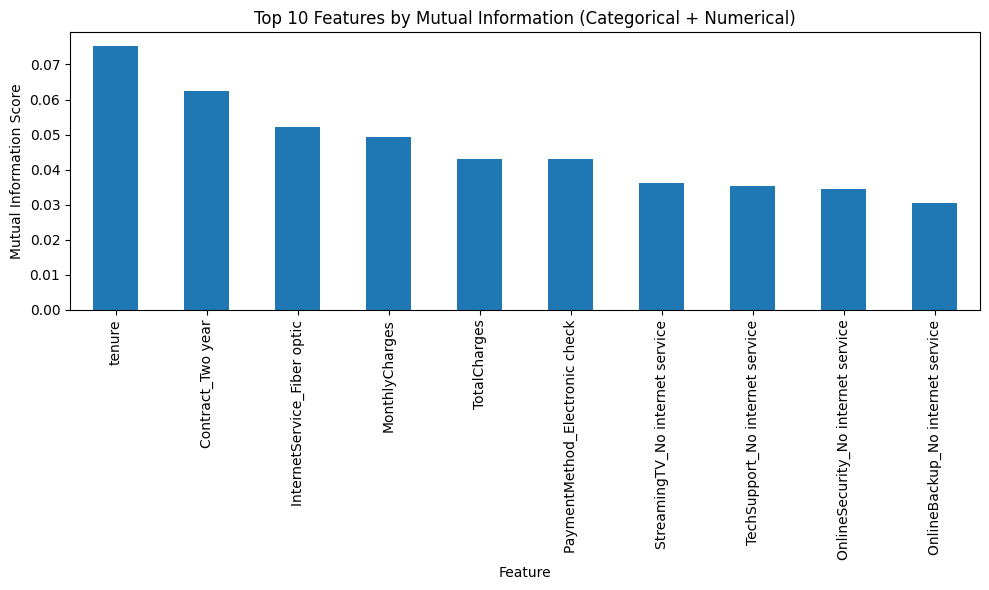

In [64]:
from sklearn.feature_selection import mutual_info_classif
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Compute mutual information
mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_series = pd.Series(mi, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

# Plot top features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
mi_series.head(10).plot(kind='bar')
plt.title('Top 10 Features by Mutual Information (Categorical + Numerical)')
plt.ylabel('Mutual Information Score')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()


In [65]:
#The feature matrix and the output vector we will use for prediction

selected_features = ['Contract_Two year', 'tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check','PaperlessBilling_Yes', 'SeniorCitizen', 'TotalCharges']

X = df_encoded[selected_features]
y = df_encoded['Churn']

print(X)
print(y)


      Contract_Two year  tenure  MonthlyCharges  InternetService_Fiber optic  \
0                 False       1           29.85                        False   
1                 False      34           56.95                        False   
2                 False       2           53.85                        False   
3                 False      45           42.30                        False   
4                 False       2           70.70                         True   
...                 ...     ...             ...                          ...   
7038              False      24           84.80                        False   
7039              False      72          103.20                         True   
7040              False      11           29.60                        False   
7041              False       4           74.40                         True   
7042               True      66          105.65                         True   

      PaymentMethod_Electronic check  P

Preparing to use a ML model

In [66]:
#Splitting the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Contract_Two year  tenure  MonthlyCharges  InternetService_Fiber optic  \
1413               True      65           94.55                         True   
7003              False      26           35.75                        False   
3355               True      68           90.20                         True   
4494              False       3           84.30                         True   
3541              False      49           40.65                        False   
...                 ...     ...             ...                          ...   
3451              False      65           70.95                         True   
5123              False      15           75.30                         True   
4135               True      36           92.90                        False   
4249              False      10           65.90                        False   
1505              False       1           74.70                         True   

      PaymentMethod_Electronic check  P

In [67]:
!pip install xgboost

Training the XGBoost model with the data we have.

In [68]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Use scale_pos_weight = (negatives / positives)
scale = (y_train == 0).sum() / (y_train == 1).sum()

model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[783 250]
 [122 252]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1033
           1       0.50      0.67      0.58       374

    accuracy                           0.74      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.74      0.75      1407



c:\Users\aj030\OneDrive\Desktop\Telecom Customer Churn\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:38:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [81]:
#Making a single prediction
X_sin = [[False,2,30.45,True,False,True,1,60.9]]
y_sin = model.predict(X_sin)
print(y_sin)

[1]


1) If we only want to catch the churners correctly and target them with marketing campaigns, then we can try to reduce the threshold from 0.5 which increases the recall on class 1 i.e. churn.
2) But this comes at the cost of precision. We might get some false positives and target those customers which are not actually going to leave.
3) If we have a good marketing budget then we can go for this.

In [69]:
# Get predicted probabilities for class 1 (churn)
y_probs = model.predict_proba(X_test)[:, 1]

# Testing out different threshold values 
custom_thresh = 0.24
while custom_thresh <= 0.34:
    y_pred_thresh = (y_probs >= custom_thresh).astype(int)

    # Evaluate performance
    print("Threshold is : ",custom_thresh)
    print(confusion_matrix(y_test, y_pred_thresh))
    print(classification_report(y_test, y_pred_thresh))
    custom_thresh += 0.02


Threshold is :  0.24
[[618 415]
 [ 58 316]]
              precision    recall  f1-score   support

           0       0.91      0.60      0.72      1033
           1       0.43      0.84      0.57       374

    accuracy                           0.66      1407
   macro avg       0.67      0.72      0.65      1407
weighted avg       0.79      0.66      0.68      1407

Threshold is :  0.26
[[635 398]
 [ 66 308]]
              precision    recall  f1-score   support

           0       0.91      0.61      0.73      1033
           1       0.44      0.82      0.57       374

    accuracy                           0.67      1407
   macro avg       0.67      0.72      0.65      1407
weighted avg       0.78      0.67      0.69      1407

Threshold is :  0.28
[[653 380]
 [ 70 304]]
              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1033
           1       0.44      0.81      0.57       374

    accuracy                           0.68      1

We found out that 0.28, 0.3 and 0.32 are some good thresholds that we can keep to improve recall, which matters in our case

Since churners are only around 27% of our dataset, accuracy is not a reliable indicator.

Plotting the PR curve and ROC curves

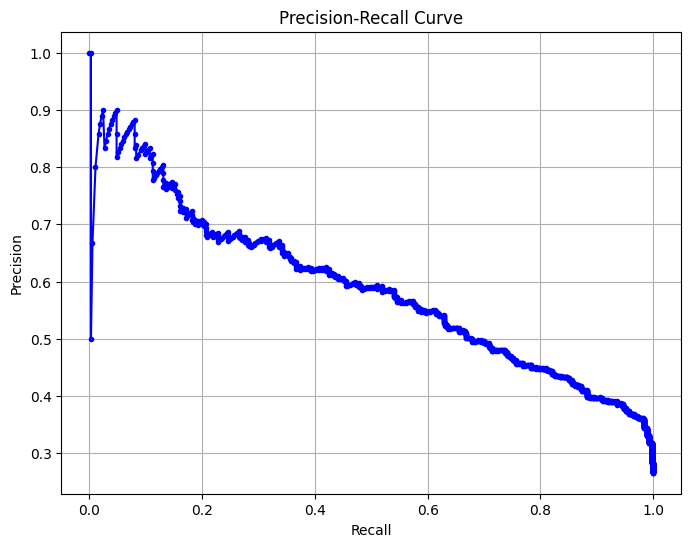

In [70]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', color='b')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()


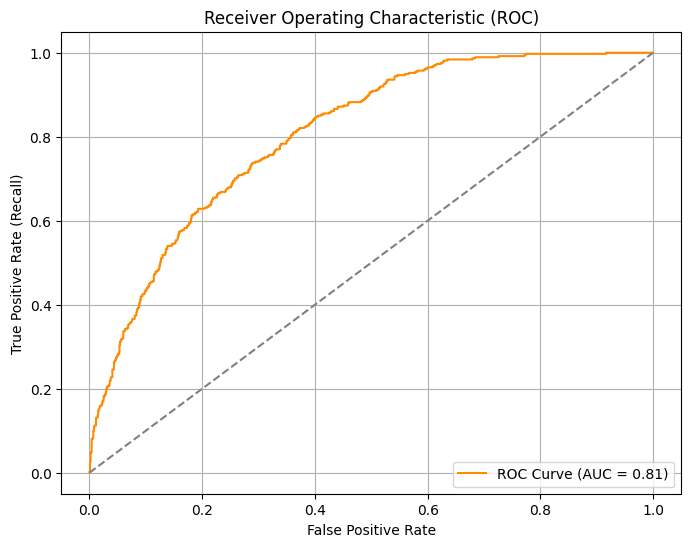

In [71]:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc), color='darkorange')
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # diagonal line
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Using SHAP to explain our predictions

In [72]:
!pip install shap

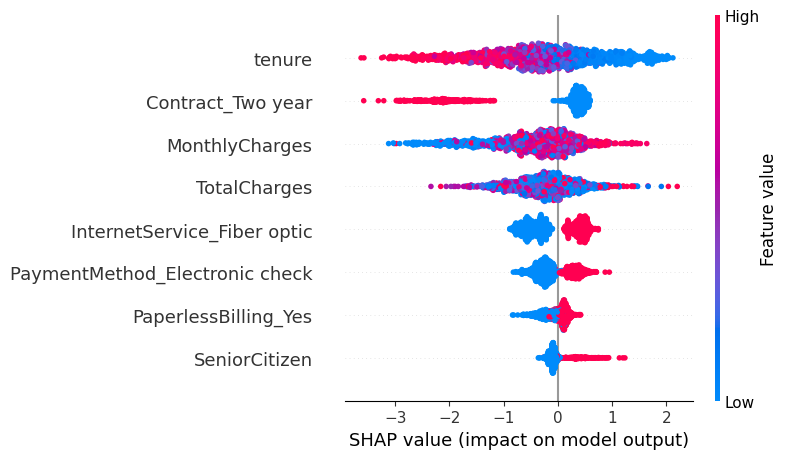

In [73]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


In [ ]:
#Making all the predictions and associating them to customerID so we know who to target
df.head()
df_res = df
df_res.head()
print(X)
all_predictions = model.predict(X)
df_res['Pred_Churn'] = all_predictions
del df_res['Churn']
df_res.head()

      Contract_Two year  tenure  MonthlyCharges  InternetService_Fiber optic  \
0                 False       1           29.85                        False   
1                 False      34           56.95                        False   
2                 False       2           53.85                        False   
3                 False      45           42.30                        False   
4                 False       2           70.70                         True   
...                 ...     ...             ...                          ...   
7038              False      24           84.80                        False   
7039              False      72          103.20                         True   
7040              False      11           29.60                        False   
7041              False       4           74.40                         True   
7042               True      66          105.65                         True   

      PaymentMethod_Electronic check  P

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MonthlyCharges_bin,Pred_Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0-12,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,25-48,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0-12,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,25-48,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0-12,1
